In [1]:
import tensorflow as tf
a=tf.constant([[1,2,3],[4,5,6]])
print(a)
print(a.shape)
print(a.dtype)

tf.Tensor(
[[1 2 3]
 [4 5 6]], shape=(2, 3), dtype=int32)
(2, 3)
<dtype: 'int32'>


In [3]:
a[:,:2]

<tf.Tensor: id=4, shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [4, 5]])>

In [4]:
a_1=a[...,1]
a_2=a[...,1,tf.newaxis]
print(a_1)
print(a_2)

tf.Tensor([2 5], shape=(2,), dtype=int32)
tf.Tensor(
[[2]
 [5]], shape=(2, 1), dtype=int32)


In [5]:
b_0=a+100
b_1=tf.square(a)
print(b_0)
print(b_1)

tf.Tensor(
[[101 102 103]
 [104 105 106]], shape=(2, 3), dtype=int32)
tf.Tensor(
[[ 1  4  9]
 [16 25 36]], shape=(2, 3), dtype=int32)


In [6]:
a.numpy()

array([[1, 2, 3],
       [4, 5, 6]])

In [7]:
import numpy as np
c=np.array([[1,2],[3,4],[5,6]])
d_1=tf.transpose(c)
d_2=c.T

In [8]:
print(c)
print(d_1)
print(d_2)

[[1 2]
 [3 4]
 [5 6]]
tf.Tensor(
[[1 3 5]
 [2 4 6]], shape=(2, 3), dtype=int32)
[[1 3 5]
 [2 4 6]]


In [10]:
t1=1
t2=100.
tf.cast(t1,tf.float32)+t2

<tf.Tensor: id=22, shape=(), dtype=float32, numpy=101.0>

In [11]:
k=tf.Variable([[1.,2,3],[4,5,6]])
print(k)

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>


In [12]:
tf.constant([[1,2,3],[4,5,6]])

<tf.Tensor: id=32, shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]])>

In [13]:
k.assign(k**2)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[ 1.,  4.,  9.],
       [16., 25., 36.]], dtype=float32)>

In [14]:
k[0,1].assign(100)

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1., 100.,   9.],
       [ 16.,  25.,  36.]], dtype=float32)>

In [15]:
k[:,2].assign([0,0])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[  1., 100.,   0.],
       [ 16.,  25.,   0.]], dtype=float32)>

In [16]:
k.scatter_nd_update(indices=[[0,0],[1,0]],updates=[999,999])

<tf.Variable 'UnreadVariable' shape=(2, 3) dtype=float32, numpy=
array([[999., 100.,   0.],
       [999.,  25.,   0.]], dtype=float32)>

# 3/25

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

#데이터 불러오기
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

11493376/11490434 [==============================] - 15s 1us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)


x_train: 3d tensor
y 값: 1d tensor => CNN,MLP 못씀. RNN은 가능.

In [4]:
import keras
keras.__version__

'2.4.3'

y_train, y_test 데이터 분포 살펴보기 (dictionary로)

In [19]:
unique,counts=np.unique(y_train,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))
unique,counts=np.unique(y_test,return_counts=True)
print('Train labels:',dict(zip(unique,counts)))

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Train labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


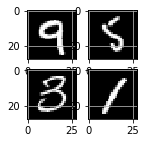

In [20]:
# 4개의 임의 표본 추출하기
indices=np.random.randint(0,x_train.shape[0],size=4)
images=x_train[indices]
labels=y_train[indices]
# 4개 표본 그림그리기
plt.figure(figsize=(2,2))
for i in range(len(indices)):
    plt.subplot(2,2,i+1)
    image=images[i]
    plt.imshow(image, cmap='gray')
    plt.grid('off')
plt.show()

In [21]:
# one-hot coding을 위한 라이브러리 불러오기 (to_categorical)
from tensorflow.keras.utils import to_categorical, plot_model
num_features=784  #x_train.shape[1]*x_train.shape[2]
x_train=x_train.reshape(-1,num_features).astype('float32')# 또는 np.reshape(x_train, (-1,num_features)).astype('float32')
x_test=x_test.reshape(-1,num_features).astype('float32')

#reshape안에 '-1'대신 x_train.shape[0]을 써도 되지만 '-1'을 해줌으로써 해당 axis의 값을 스스로 계산하게 한다.
#예를 들어 x의 shape이 (100,200,3)일 때 x.reshape(-1,100)으로 하면 x의 shape은 (600,100)으로 된다.

x_train=x_train/255.
x_test=x_test/255.

# 10개의 범주형 자료를 one-hot 벡터로 바꿔주기
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
num_classes=y_train.shape[1]
print(y_train.shape)

(60000, 10)


MLP 돌리기 위해 x 의 shape을 2D tensor로 reshape함
* reshape 시 60000 대신 -1 을 사용함.
* float로 바꾸고,
* 255로 나눠서 0 과 1 사이의 범위로 만듦(standarization) - 특정 범위에 몰려있는 현상을 없애기 위해. 미분 잘되게 하기 위해.
* 1.0 은 백색, 0.0 은 흑색으로 인식하게 됨.

y 의 shape이 2D tensor로 바뀜

# MLP 모형 Setup
sample 을 넣지 않은 상태.

## Sequential API

======================================
* 첫 글자 대문자 : 이미 짜여있는 class 불러오는것임 (Sequential,Dense,Activation,Dropout)
* Spyder 로 class를 만들고 (.py형식, 맞춤형으로) 얼마든지 import할 수 있다.

* Sequential API 는  "차례대로" 간다.

======================================

num_features=784 (입력층 dimension)
* 필요한 모수 개수 = 785 개의 모수(784+bias1개) * 256개의 node수 = 200960
* 256개 각각의 노드가 activation function relu를 통과.

======================================

model.add(Dropout(0.45))
* 노드 중 45%를 random 으로 0으로 만듦
* 매 iteration 마다 0이 되는 노드는 random 함
* 따라서 각 iteration 마다 모형이 다 다름. 
* 이 때문에 서로 다른 모형들을 적합시키는 효과가 나타남. => ensemble learning 기법임. (서로 다른 모형을 평균내는게 앙상블 러닝임. robustness. 좋은것임. 어느 한쪽 모형에 depend 하지 않고, **overfitting 방지**에 매우 좋음)

param# : 257 * 256 = 65792 개 

======================================

num_classes = 10개의 class, softmax 를 사용 
=> categorical crossentropy 로 연결됨.

실제 모수는 2570개 (?)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


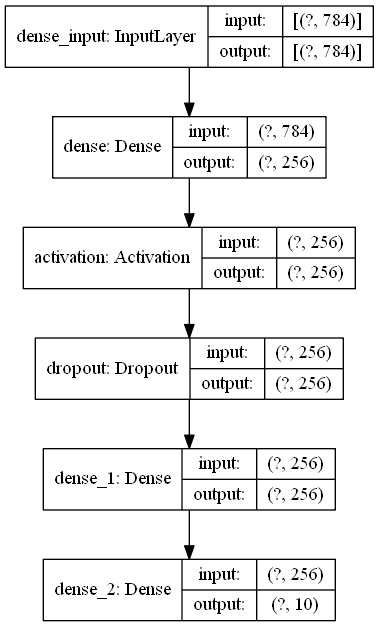

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

#2개의 은닉층과 1개의 출력층으로 구성된 MLP모형
model=Sequential()
model.add(Dense(256,input_dim=num_features)) #input은 1D tensor
model.add(Activation('relu'))
# 또는 model.add(Dense(256, input_dim=num_features,activation='relu'))로 Dense와 Activation을 함께 쓸 수 있음
model.add(Dropout(0.45))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()
plot_model(model,to_file='C:/Users/yspark/Desktop/딥러닝교재/제 4장 TensorFlow 2.x-Keras/ch4_1.png', show_shapes=True)

train data 중 10000개를 validation data 로 할당.

In [23]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]
print(partial_x_train.shape)
print(partial_y_train.shape)

(50000, 784)
(50000, 10)


* optimization function 을 선택. adam 으로 선택함.

* 모델을 데이터에 적합 (fit) 함.
    * seed number 가 다르기 때문에 돌릴 때마다 accuracy 다름. parameter 가 random 으로 할당되어 시작되기 때문에.

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(partial_x_train, partial_y_train, epochs=10, batch_size=64,validation_data=(x_val,y_val))
history_out=history.history
history_out.keys()

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 5s 100us/sample - loss: 0.3345 - accuracy: 0.8999 - val_loss: 0.1398 - val_accuracy: 0.9561
Epoch 2/10
50000/50000 [==============================] - 4s 86us/sample - loss: 0.1682 - accuracy: 0.9482 - val_loss: 0.1087 - val_accuracy: 0.9673
Epoch 3/10
50000/50000 [==============================] - 5s 91us/sample - loss: 0.1295 - accuracy: 0.9591 - val_loss: 0.1022 - val_accuracy: 0.9707
Epoch 4/10
50000/50000 [==============================] - 5s 94us/sample - loss: 0.1137 - accuracy: 0.9637 - val_loss: 0.0881 - val_accuracy: 0.9736
Epoch 5/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.0972 - accuracy: 0.9689 - val_loss: 0.0886 - val_accuracy: 0.9731
Epoch 6/10
50000/50000 [==============================] - 4s 88us/sample - loss: 0.0908 - accuracy: 0.9713 - val_loss: 0.0806 - val_accuracy: 0.9756
Epoch 7/10
50000/50000 [==============================]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

history 를 불러서 그래프를 그려봄.

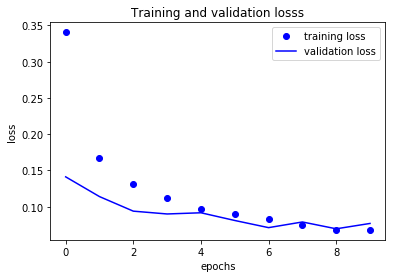

In [8]:
import matplotlib.pyplot as plt

loss=history_out['loss']
loss_val=history_out['val_loss']
accuracy=history_out['accuracy']
accuracy_val=history_out['val_accuracy']
plt.plot(loss,'bo',label='training loss')
plt.plot( loss_val,'b', label='validation loss' )
plt.title('Training and validation losss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

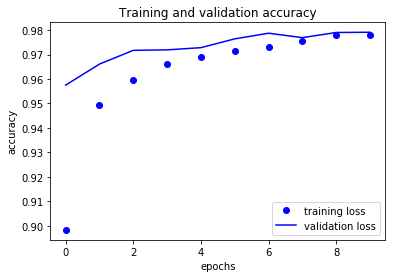

In [9]:
plt.clf()
plt.plot(accuracy,'bo',label='training loss')
plt.plot(accuracy_val,'b', label='validation loss' )
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.fit(x_train,y_train,epochs=30,batch_size=64)


Epoch 1/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.0744 - accuracy: 0.9767
Epoch 2/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0679 - accuracy: 0.9786
Epoch 3/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0613 - accuracy: 0.9804
Epoch 4/30
60000/60000 [==============================] - 2s 27us/step - loss: 0.0584 - accuracy: 0.9806
Epoch 5/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0549 - accuracy: 0.9822
Epoch 6/30
60000/60000 [==============================] - 2s 28us/step - loss: 0.0536 - accuracy: 0.9820
Epoch 7/30
60000/60000 [==============================] - 2s 30us/step - loss: 0.0517 - accuracy: 0.9829
Epoch 8/30
60000/60000 [==============================] - 2s 32us/step - loss: 0.0507 - accuracy: 0.9836
Epoch 9/30
60000/60000 [==============================] - 2s 31us/step - loss: 0.0453 - accuracy: 0.9854
Epoch 10/30
60000/60000 [==============================

test data 로 generality 를 check

In [61]:
import pandas as pd
result_train=model.evaluate(x_train,y_train)
result_test=model.evaluate(x_test,y_test)
print(result_train)
print(result_test)
pred=model.predict(x_test)
pred=pd.DataFrame(pred)
pred.head()

10000/10000 [==============================] - 0s 25us/step
[0.0016932068984431984, 0.9996166666666667]
[0.07724655894196203, 0.9853]


,0,1,2,3,4,5,6,7,8,9
0,6.194058e-20,1.543851e-16,5.002994e-12,5.879471e-12,1.921653e-17,2.172387e-20,8.632302e-35,1.000000e+00,1.505898e-15,1.402312e-10
1,1.773110e-15,1.343046e-16,1.000000e+00,2.149296e-15,3.389081e-21,1.079731e-18,7.891478e-17,2.729345e-17,1.753549e-15,1.040158e-20
2,1.003085e-12,9.999998e-01,1.764042e-07,2.180762e-11,4.792377e-10,6.744931e-13,8.021288e-09,8.970715e-08,1.060192e-08,1.556031e-15
3,1.000000e+00,2.679071e-22,8.096132e-12,6.897116e-14,3.153140e-16,2.451457e-12,1.956611e-10,2.660714e-17,2.974304e-18,1.921593e-11
4,1.328908e-09,3.842744e-12,2.796849e-11,8.706871e-13,9.999994e-01,4.950115e-14,9.592601e-10,4.728687e-07,6.603913e-11,1.569124e-07


## functional API
이런 식으로도 표현할 수 있다.

In [69]:
import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.models import Model

x=Input(shape=(num_features,))
h1=Dense(256, activation='relu')(x)
h1=Dropout(0.45)(h1)
h2=Dense(256, activation='relu')(h1)
out=Dense(num_classes, activation='softmax')(h2)
model=Model(inputs=x, outputs=out)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['acc'])
model.fit(x_train,y_train,epochs=30,batch_size=64)

Epoch 1/30
60000/60000 [==============================] - 3s 51us/step - loss: 0.3077 - acc: 0.9065
Epoch 2/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.1544 - acc: 0.9529
Epoch 3/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.1252 - acc: 0.9620
Epoch 4/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.1051 - acc: 0.9670
Epoch 5/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0950 - acc: 0.9699
Epoch 6/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0870 - acc: 0.9719
Epoch 7/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0801 - acc: 0.9748
Epoch 8/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0717 - acc: 0.9768
Epoch 9/30
60000/60000 [==============================] - 2s 41us/step - loss: 0.0701 - acc: 0.9779
Epoch 10/30
60000/60000 [==============================] - 2s 40us/step - loss: 0.0638 - acc: 0.9792

In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation,Layer

class MyLayer(Layer):
    def __init__(self, out_dim):
        self.out=out_dim
        super(MyLayer,self).__init__()
    def build(self,input_shape):
        self.kernel=self.add_weight(shape=(input_shape[1],self.out),trainable=True)
        
    def call(self,inputs):
        return tf.matmul(inputs,self.kernel)
    
model=tf.keras.Sequential([Dense(2,input_shape=(2,)),MyLayer(4),Activation('relu')])
model.summary()
model1=tf.keras.Sequential()
model1.add(Dense(2, input_shape=(2,)))
model1.add(MyLayer(4))
model1.add(Activation('relu'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 2)                 6         
_________________________________________________________________
my_layer_2 (MyLayer)         (None, 4)                 8         
_________________________________________________________________
activation_2 (Activation)    (None, 4)                 0         
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 6         
_________________________________________________________________
my_layer_3 (MyLayer)         (None, 4)                 8         
____________________________________

In [ ]:
pip install --upgrade tensorflow-gpu